# Analyzing Movie Reviews

Notebook by [Wenyi Xu](https://github.com/xuwenyihust)

<br/>

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats.stats import pearsonr

%matplotlib inline

## Import Data

**pd.read_csv()** can directly read url

In [3]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv"
reviews = pd.read_csv(url)
reviews.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


## Data Summaries

Get some summaries about the raw data.

In [4]:
reviews.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

## Rotten Tomatoes VS. IMDB

Want to compare the user scores of Rotten Tomatoes & IMDB.

First get some summaries of these 2 columns.

In [29]:
print('Rotton Tomato score min:\t' + str(reviews["RT_user_norm"].min()))
print('Rotton Tomato score max:\t' + str(reviews["RT_user_norm"].max()))
print('-'*50)
print('IMDB score min:\t\t\t' + str(reviews["IMDB_norm"].min()))
print('IMDB score max:\t\t\t' + str(reviews["IMDB_norm"].max()))

Rotton Tomato score min:	1.0
Rotton Tomato score max:	4.7
--------------------------------------------------
IMDB score min:			2.0
IMDB score max:			4.3


So we guess RT user scores have a **larger spread** compared to IMDB's.

<br/>

In [81]:
print(reviews["RT_user_norm"].mean())
print(reviews["IMDB_norm"].mean())

3.1938356164383572
3.3684931506849316


## Histograms Comparison

Compare the **distribution** of **Rotten Tomatoes** & **IMDB** user scores. 

To have a fair comparison, choose col **"RT_user_norm"** & **"IMDB_norm"** to have them both in 0~5.

<br/>

(1, 5.0)

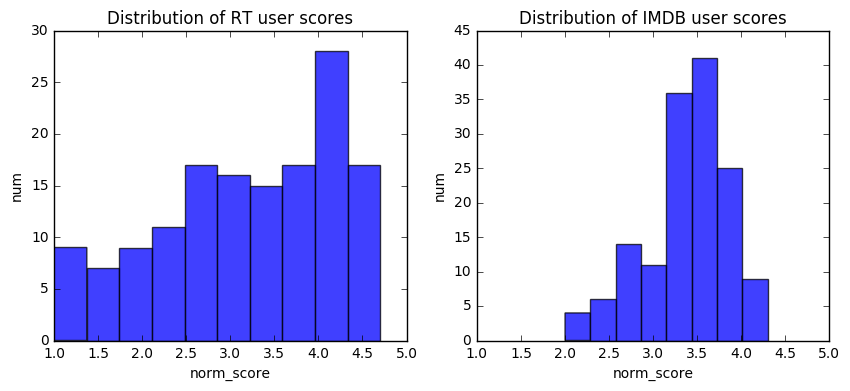

In [78]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
ax1.hist(reviews["RT_user_norm"], bins=10, facecolor='blue', alpha=0.75)
ax1.set_title("Distribution of RT user scores")
ax1.set_xlabel("norm_score")
ax1.set_ylabel("num")
ax1.set_xlim(1,5.0)

ax2 = fig.add_subplot(1,2,2)
ax2.hist(reviews["IMDB_norm"], bins=8, facecolor='blue', alpha=0.75)
ax2.set_title("Distribution of IMDB user scores")
ax2.set_xlabel("norm_score")
ax2.set_ylabel("num")
ax2.set_xlim(1,5.0)

From the above charts, we can see that 

the distribution of **RT's** rating is more **flat**.

While the **IMDB** ratings are much more **clustered** around some value between 3 & 3.5, and **skews left**.

<br/>

## Variance Comparison

To directly show how spread they are, can also calculate the **variance**.

In [85]:
print(np.var(reviews["RT_user_norm"]))
print(np.var(reviews["IMDB_norm"]))

0.995578438731469
0.228219647213361


The result conforms to the distribution visualization.

<br/>

## Correlations


Want to know the correlations between RT's & IMDB's scores.

First show the scatter plot.

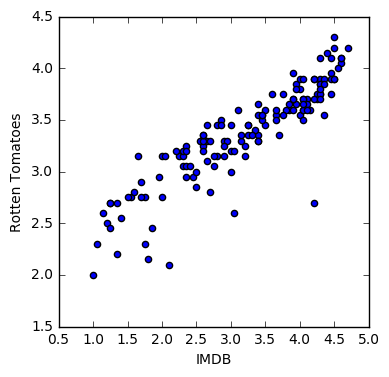

In [90]:
plt.figure(figsize=(4,4))
plt.scatter(reviews["RT_user_norm"], reviews["IMDB_norm"])
plt.xlabel("IMDB")
plt.ylabel("Rotten Tomatoes")
plt.show()

Looks kind of linear.

<br/>

## Add the regression line

Use the line chart to plot the regression line.

In [95]:
slope, intercept, r_value, p_value, stderr_slope = linregress(reviews["RT_user_norm"], reviews["IMDB_norm"])

In [96]:
def predict(x):
    return x * slope + intercept

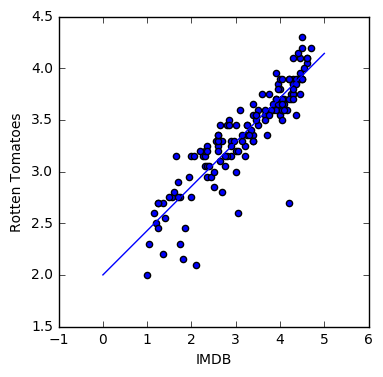

In [101]:
plt.figure(figsize=(4,4))
plt.scatter(reviews["RT_user_norm"], reviews["IMDB_norm"])
plt.xlabel("IMDB")
plt.ylabel("Rotten Tomatoes")

x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
y = [predict(i) for i in x]
plt.plot(x,y)

## Correlation Coefficient



In [106]:
print(pearsonr(reviews["RT_user_norm"], reviews["IMDB_norm"])[0])

0.895297241948
